<a href="https://colab.research.google.com/github/lshpy/DeepLearning_basic/blob/main/5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 결정트리

로지스틱 회귀로 와인 분류하기

In [2]:
import pandas as pd
wine = pd.read_csv('http://bit.ly/wine_csv_data')
wine.head()
# class: 0 > 레드와인, 1 > 화이트 와인
# 전체와인에서 화이트 와인을 골라내자

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()
# 각 열의 데이터 타입과 누락된 데이터의 개수


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()
# describe()는 열에 대한 간략한 통계를 출력

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
# 데이터 분비하고 분할, 표준화

data = wine.iloc[:, :-1].to_numpy()
target  = wine['class'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size =0.2, random_state=42
)

# test_size = 0.2 : 20% 정도만 테스트 세트로 나눈다

In [7]:
train_input.shape # 80%
test_input.shape # 20%

(1300, 3)

In [8]:
# 데이터 표준화

from sklearn.preprocessing import StandardScaler
ss=  StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled  = ss.transform(test_input)

In [9]:
from sklearn.linear_model import LogisticRegression
lr  = LogisticRegression()

lr.fit(train_scaled, train_target)
# 로지스틱 회귀 모델: 이진 분류법

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


결정트리

장점: 이유를 설명하기 쉽다

In [10]:
# 로지스틱 회귀가 학습한 계수와  절편을 출력

print(lr.coef_, lr.intercept_)
# 계수를 가지고 설명할 수 있는 것은 굉장히 제한적!

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
# 과대적합


0.996921300750433
0.8592307692307692


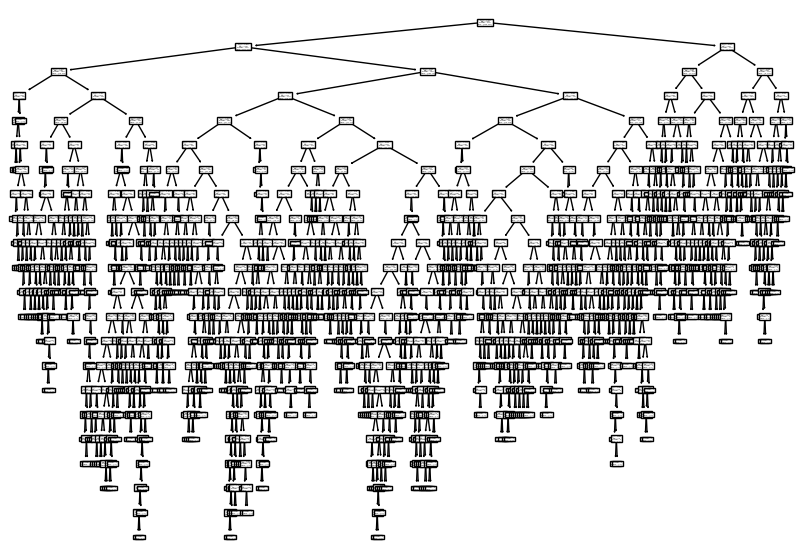

In [12]:
# 그림을 그려서 트리모델을 더 살펴보자
# plot_tree(): 결정트리모델을 그려주는 함수

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

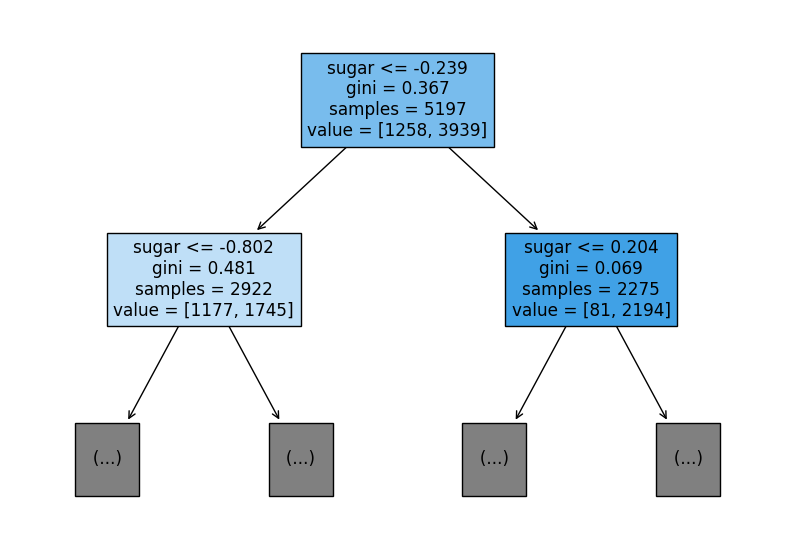

In [13]:
# 일정부분만
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 클래스의 비율이 높아지면 점점 진한색으로 표시한다
# yes: 왼쪽, no: 오른쪽

# value = [음성클래스, 양성클래스 ]
# 루트의 노드에 따라서 구분

# 각 노드에 도달한 샘플은 다수의 클래스에 따라서 성질이 결정된다!
# if 음성 < 양성: 양성 클래스로 측정된다


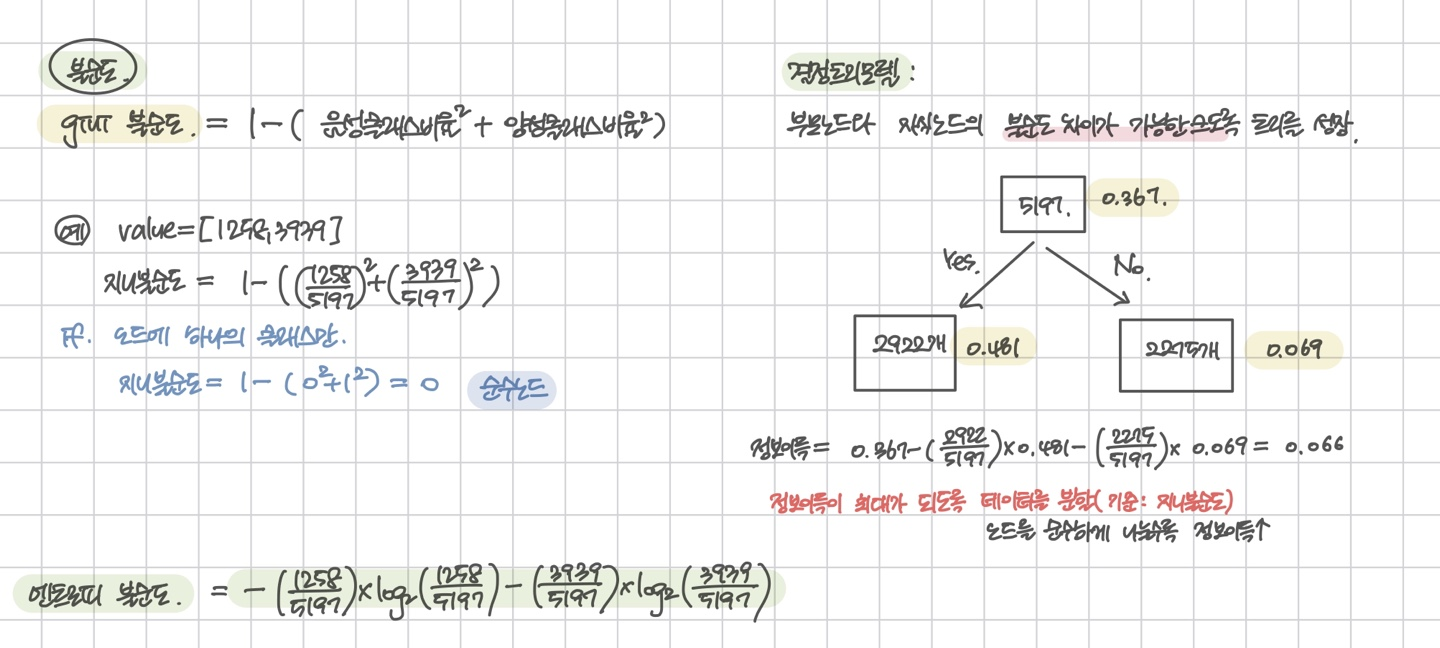

In [21]:
dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
# 최대 3개의 노드까지만 깊이를 지정하는 것
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


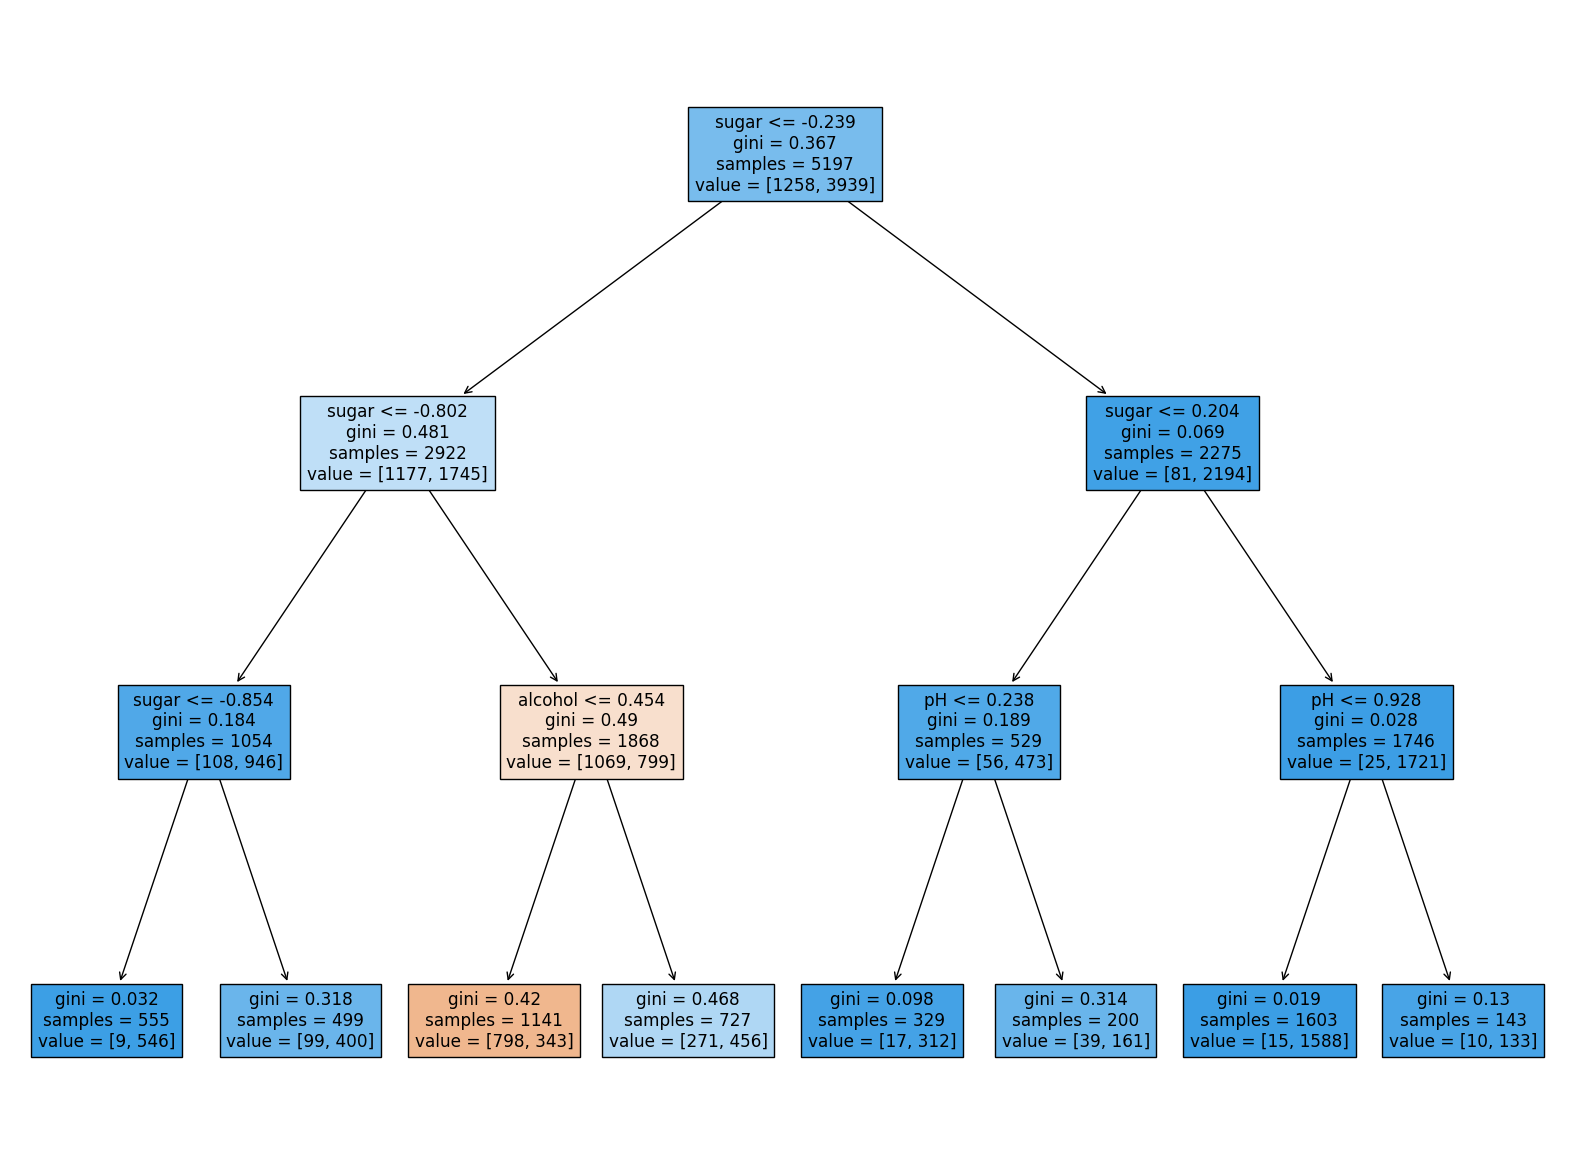

In [27]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [28]:
print(dt.feature_importances_)
# 두번쨰 특성인 당도가 0.87정도로 중요도가 가장 높다
# 모든 값을 다 더하면 1
#

[0.12345626 0.86862934 0.0079144 ]
